In [56]:
import numpy as np
import matplotlib.pylab as plt
import nltk
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import TruncatedSVD
%matplotlib inline

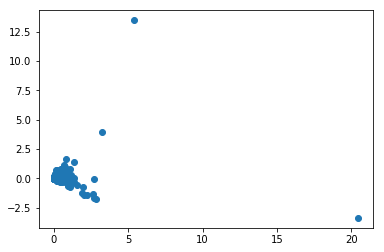

In [62]:
#Preprocessing the data first
lemmatizer = WordNetLemmatizer()

titles = [line.rstrip() for line in open('all_book_titles.txt')] 
stopwords = set(w.rstrip() for w in open('stopwords.txt'))

lemmatizer = WordNetLemmatizer()

def my_tokenizer(s):
    s=s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2]
    #word into base form
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if not t in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens



def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map)) 
    for token in tokens:
        i = word_index_map[token]
        x[i]=1
    return x    
    
    
#figure the index of each words by going entire the vocabulary
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = {}


#Preprocessing the data
for title in titles:
        #title = title.encode('ascii','ignore')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map[current_index]=token

    
#print(all_tokens)
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N))

i=0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i+=1
    

svd = TruncatedSVD()
Z = svd.fit_transform(X)


plt.scatter(Z[:,0],Z[:,1])
# for i in range(D):
#     plt.annotate(s=index_word_map[i], xy=(Z[:,0],Z[:,1]))

plt.show()